In [271]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sbs
import scipy.optimize as op

%% Machine Learning Online Class - Exercise 2: Logistic Regression
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the logistic
%  regression exercise. You will need to complete the following functions 
%  in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.


In [272]:
fname='ex2data2.txt';
#dtype = np.dtype([('X', 'f8'), ('y', 'f8')])
df = pd.read_csv(fname,delimiter=',',header=None)
df.columns = ['MicrochipTest1', 'MicrochipTest2','passed']
data=np.asmatrix(df)
X = np.matrix(data[:, 0:2]); 
y = np.matrix(data[:, 2]);
[m, n] = X.shape;

%% ==================== Part 0: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

['Plotting data with + indicating (passed = 1) examples and o  indicating (passed = 0) examples.\n']


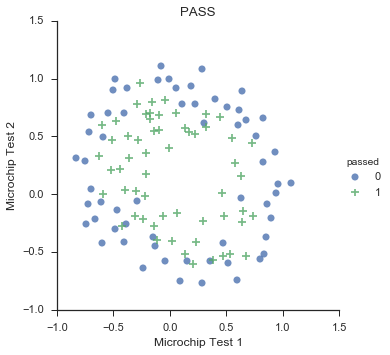

In [273]:
print(['Plotting data with + indicating (passed = 1) examples and o  indicating (passed = 0) examples.\n']);
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('MicrochipTest1', 'MicrochipTest2',
           data=df,
           fit_reg=False,
           hue="passed",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":50})
plt.title('PASS')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')


%% =========== Part 1: Regularized Logistic Regression ============
%  In this part, you are given a dataset with data points that are not
%  linearly separable. However, you would still like to use logistic 
%  regression to classify the data points. 
%
%  To do so, you introduce more features to use -- in particular, you add
%  polynomial features to our data matrix (similar to polynomial
%  regression).
%

% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled

In [274]:
def sigmoid(z):
    #%SIGMOID Compute sigmoid function
    #%g = SIGMOID(z) computes the sigmoid of z.

    #% You need to return the following variables correctly 
    g = np.matrix(np.zeros(np.shape(z)));

#% ====================== YOUR CODE HERE ======================
#% Instructions: Compute the sigmoid of each value of z (z can be a matrix,vector or scalar).
    g = np.divide(1,(1+np.exp(-z)));    
    return g

In [276]:
def mapFeatures(X):
    #% MAPFEATURE Feature mapping function to polynomial features
    #%
    #%   MAPFEATURE(X) maps the two input features
    #%   to quadratic features used in the regularization exercise.
    #%   Returns a new feature array with more features, comprising of 
    #%   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    #%   Inputs X1, X2 must be the same size

    degree = 6;
    [m, n] = X.shape;
    out = np.ones((m,1));
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.append(out,np.multiply(np.power(X[:,0],(i-j)),np.power(X[:,1],j)),axis=1);
    return out

In [277]:
def costFunctionReg(theta, X, y, lamb):
    #%COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    #%   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    #%   theta as the parameter for regularized logistic regression and the
    #%   gradient of the cost w.r.t. to the parameters. 
    #% Initialize some useful values
    m=len(y);
    J = 0;
    grad = np.zeros(theta.shape);
    n = theta.shape[0];
    if len(np.shape(theta))==1:
        theta = np.transpose(np.matrix(theta)); 
    #Compute the cost of a particular choice of theta.
    #You should set J to the cost.
    #Compute the partial derivatives and set grad to the partial 
    #derivatives of the cost w.r.t. each parameter in theta
    H=sigmoid(X*theta);
    #J = sum((-y.*log(H)-(1-y).*log(1-H)))/m+lambda/2/m*sum(theta(2:n).^2);
    J = np.sum(np.multiply(-y,np.log(H))-np.multiply((1-y),np.log(1-H)))/m \
        +np.sum(np.power(theta[1:n],2))*lamb/2.0/m;
    grad=np.transpose(X)*(H-y)/m+lamb/m*theta;
    grad[0] = grad[0]-lamb/m*theta[0];
    #grad=1
    return J,grad

In [278]:
X = mapFeatures(X);
n=X.shape[1];
#% Initialize fitting parameters
initial_theta = np.zeros((n, 1));

#% Set regularization parameter lambda to 1
lamb = 1;

#% Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X, y, lamb);
print('Cost at initial theta (zeros): %f' %cost);
print('Expected cost (approx): 0.693');
print('Gradient at initial theta (zeros) - first five values only:');
print( grad[0:5]);
print('Expected gradients (approx) - first five values only:');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [279]:
test_theta = np.ones((n, 1));
[cost, grad] = costFunctionReg(test_theta, X, y, lamb);

print('Cost at test theta: %f'% cost);
print('Expected cost (approx): 2.13');
print('Gradient at test theta - first five values only:');
print(grad[0:5]);
print('Expected gradients (approx) - first five values only:');
print(' 0.3460\n 0.0851\n 0.1185\n 0.1506\n 0.0159\n');

Cost at test theta: 2.134848
Expected cost (approx): 2.13
Gradient at test theta - first five values only:
[[ 0.34604507]
 [ 0.07660616]
 [ 0.11004999]
 [ 0.14211702]
 [ 0.00743991]]
Expected gradients (approx) - first five values only:
 0.3460
 0.0851
 0.1185
 0.1506
 0.0159



%% ============= Part 2: Regularization and Accuracies =============
%  Optional Exercise:
%  In this part, you will get to try different values of lambda and 
%  see how regularization affects the decision coundart
%
%  Try the following values of lambda (0, 1, 10, 100).
%
%  How does the decision boundary change when you vary lambda? How does
%  the training set accuracy vary?

In [288]:
lamb=10 #try lamb = 0 (88.9%);lamb = 0.5 (83.2); 1(84.7);10(84.75);100()
Result = op.minimize(fun = costFunctionReg, 
                    x0 = initial_theta, 
                    args = (X, y,lamb),
                    method = 'TNC',
                    jac = True);
optimal_theta = np.transpose(np.matrix(Result.x))
cost, grad = costFunctionReg(optimal_theta, X, y,lamb);


function plotDecisionBoundary(theta, X, y) 
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with 
%the decision boundary defined by theta 
% PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
% positive examples and o for the negative examples. X is assumed to be 
% a either 
% 1) Mx3 matrix, where the first column is an all-ones column for the 
% intercept. 
% 2) MxN, N>3 matrix, where the first column is all-ones

In [281]:
def plotDecisionBoundary(theta, X, y):
    m,n=X.shape    
    if n <= 3:
        #% Only need 2 points to define a line, so choose two endpoints
        plot_x = (np.min(X[:,2])-2,  np.max(X[:,2])+2);
        #% Calculate the decision boundary line
        plot_y = np.multiply(np.divide(-1,theta[2]),np.multiply(theta[1],plot_x) + theta[0]);

    #% Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y,lw=2);
        plt.axis([30, 100, 30, 100])
    
    #% Legend, specific for the exercise
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,['Admitted', 'Not admitted', 'Decision Boundary'])     
    else:
        #% Here is the grid range
        u = np.linspace(-1, 1.5, 50);
        v = np.linspace(-1, 1.5, 50);
        u_surf,v_surf=np.meshgrid(u,v);
        z = np.zeros((len(u),len(v)));
        #% Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = mapFeatures(np.matrix([u[i],v[j]]))*theta;
        return u,v,z

<a list of 4 text.Text objects>

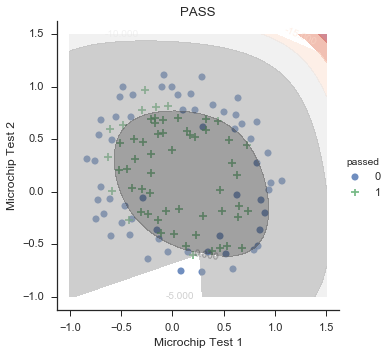

In [297]:
u,v,z=plotDecisionBoundary(optimal_theta, X, y)
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('MicrochipTest1', 'MicrochipTest2',
           data=df,
           fit_reg=False,
           hue="passed",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":50})
plt.title('PASS')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.hold(True)
CS=plt.contourf(u, v, z, 5,alpha=0.5,cmap='RdGy')
plt.clabel(CS, inline=True, fontsize=10)

In [283]:
def predict(theta, X):
    #%PREDICT Predict whether the label is 0 or 1 using learned logistic 
    #%regression parameters theta
    #%   p = PREDICT(theta, X) computes the predictions for X using a 
    #%   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    m,n = X.shape; #% Number of training examples

    #% You need to return the following variables correctly
    p = np.zeros((m, 1));

    #% ====================== YOUR CODE HERE ======================
    #% Instructions: Complete the following code to make predictions using
    #%               your learned logistic regression parameters. 
    #%               You should set p to a vector of 0's and 1's

    p= sigmoid(X*theta);
    def comp(x):
        if x>=0.5:
            y=1
        else:
            y=0
        return y
    p = np.array(map(lambda x: comp(x), p))
    return p

In [298]:
p = predict(optimal_theta, X);
p = np.transpose(np.matrix(p));
accuracy = np.mean((np.equal(p,y)).astype(int))*100
print('Train Accuracy: %f' %accuracy);
print('Expected accuracy (with lambda = 1): 83.1 (approx)');


Train Accuracy: 84.745763
Expected accuracy (with lambda = 1): 83.1 (approx)


In [1]:
from numpy import random_sample

ImportError: cannot import name random_sample

###### np.array([u == v for u in p]).astype(int)